# Machine learning - Features extraction

Runs binary and multi-class classifiers on a given dataset.
Dataset are read as Parquet file. The dataset must contain a feature vector named "features" and a classification column.

## Imports

In [1]:
import pandas as pd
import mltoolkit
from pyspark.sql import SparkSession
import numpy as np
import sklearn

## Configure Spark Session

In [2]:
spark = SparkSession.builder.appName("datasetClassifier").getOrCreate()

## Read in data from parquet file

In [3]:
parquetFile = './input_features/'
data = spark.read.parquet(parquetFile).cache()

df = data.toPandas()
print(f"Total number of data: {df.shape[0]}")
df.head()

Total number of data: 18491


,structureChainId,alpha,beta,coil,foldType,features
0,1LBU.A,0.361502,0.107981,0.530516,other,"[-0.03669819220865391, 0.13017714411934028, 0...."
1,1LC0.A,0.410345,0.275862,0.313793,alpha+beta,"[0.017792403316538488, 0.06889735366958401, 0...."
2,1LC5.A,0.428169,0.157746,0.414084,alpha+beta,"[0.12736012024892182, -0.0036459625095703716, ..."
3,1LFP.A,0.427984,0.234568,0.337449,alpha+beta,"[0.07269115472257498, -0.010540929652990833, 0..."
4,1LFW.A,0.322650,0.273504,0.403846,alpha+beta,"[-0.027897640212830196, 0.0941510383131058, 0...."


## Select only alpha and beta foldType

In [4]:
df = df[(df.foldType == 'alpha') | (df.foldType == 'beta')]

print(f"Total number of data: {df.shape[0]}")
df.head()

Total number of data: 4937


,structureChainId,alpha,beta,coil,foldType,features
5,1LGH.A,0.857143,0.0,0.142857,alpha,"[0.23627377279441464, 0.05140024884180589, 0.4..."
6,1LGH.B,0.744186,0.0,0.255814,alpha,"[0.07006392560221933, -0.05091538017785007, 0...."
7,1LGH.D,0.857143,0.0,0.142857,alpha,"[0.23627377279441464, 0.05140024884180589, 0.4..."
8,1LGH.E,0.744186,0.0,0.255814,alpha,"[0.07006392560221933, -0.05091538017785007, 0...."
9,1LGH.G,0.857143,0.0,0.142857,alpha,"[0.23627377279441464, 0.05140024884180589, 0.4..."


## Basic dataset information and setting

In [5]:
label = 'foldType'
testFraction = 0.1
seed = 123


vector = df.features.iloc[0]
featureCount = len(vector)
print(f"Feature count    : {featureCount}")

 
classCount = df.foldType.unique().size
print(f"Class count    : {classCount}\n")

  
print(f"Dataset size (unbalanced)    : {df.shape[0]}")
print(df.foldType.value_counts())


df = mltoolkit.downsample(df, 'foldType')
print(f"\nDataset size (balanced)  : {df.shape[0]}")
print(df.foldType.value_counts())

Feature count    : 50
Class count    : 2

Dataset size (unbalanced)    : 4937
alpha    3684
beta     1253
Name: foldType, dtype: int64

Dataset size (balanced)  : 2506
beta     1253
alpha    1253
Name: foldType, dtype: int64


## Random Forest Classifier


 Class	Train	Test

alpha	1126	127

beta	1129	124

Total time taken: 0.20052623748779297

Methods	RandomForestClassifier
AUC	0.9726631953263907
F Score	0.9032258064516129
Accuracy	0.9043824701195219
Precision	0.9032258064516129
Recall	0.9032258064516129
False Positive Rate	0.0967741935483871
True Positive Rate	0.905511811023622
	
Confusion Matrix
['alpha' 'beta']
[[115  12]
 [ 12 112]]


/opt/miniconda3/envs/mmtf-workshop-2018/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


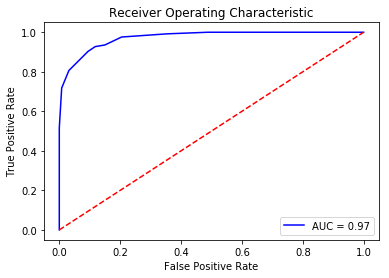

Sample predictions: 


,index,structureChainId,alpha,beta,coil,foldType,features,indexedLabel,predictions
0,17633,3SO6.Q,0.000000,0.307692,0.692308,beta,"[0.04679717467381404, 0.3444721248860543, 0.65...",1,beta
1,15877,5AZW.A,0.000000,0.638298,0.361702,beta,"[-0.21980827627213378, -0.003240449422676312, ...",1,beta
2,10908,5EWO.A,0.000000,0.481308,0.518692,beta,"[0.004428481034901699, 0.08782819747137079, 0....",1,beta
3,12458,2V0X.B,0.643902,0.014634,0.341463,alpha,"[0.13609181969768855, -0.03941942743447602, 0....",0,alpha
4,11452,4J4A.J,0.777778,0.000000,0.222222,alpha,"[0.16031929521033397, -0.2720281567711097, 0.3...",0,alpha
5,13262,2OLT.A,0.869159,0.000000,0.130841,alpha,"[0.10041343866212837, 0.057986875398463644, 0....",0,alpha
6,7073,4Y9V.A,0.043118,0.469320,0.487562,beta,"[-0.05767635944842671, 0.2050873197059935, 0.4...",1,beta
7,9036,5MJ3.A,0.023179,0.533113,0.443709,beta,"[0.08743077671674432, 0.05430643786294539, 0.4...",1,beta
8,10761,4AFK.A,0.006977,0.565116,0.427907,beta,"[0.04967376806404385, 0.18319203607183707, 0.4...",1,beta
9,7177,4B1M.B,0.000000,0.662577,0.337423,beta,"[0.010340684371919411, -0.10917012139891638, 0...",1,beta


In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
mcc = mltoolkit.MultiClassClassifier(clf, 'foldType', testFraction=0.1)
matrics = mcc.fit(df)
for k,v in matrics.items(): print(f"{k}\t{v}")

# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)    

print("Sample predictions: ")
mcc.prediction.head(10)

## Logistic Regression Classifier


 Class	Train	Test

alpha	1129	124

beta	1126	127

Total time taken: 0.10818099975585938

Methods	LogisticRegression
AUC	0.9591694183388366
F Score	0.8924302788844621
Accuracy	0.8924302788844621
Precision	0.9032258064516129
Recall	0.8818897637795275
False Positive Rate	0.0967741935483871
True Positive Rate	0.8818897637795275
	
Confusion Matrix
['alpha' 'beta']
[[112  12]
 [ 15 112]]


/opt/miniconda3/envs/mmtf-workshop-2018/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


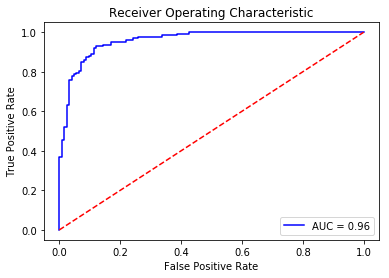

Sample predictions: 


,index,structureChainId,alpha,beta,coil,foldType,features,indexedLabel,predictions
0,4040,2F49.C,0.000000,0.368421,0.631579,beta,"[0.37820821383903763, -0.18090368550399255, 1....",1,alpha
1,8181,3R4Z.A,0.047486,0.430168,0.522346,beta,"[0.0735305376855242, 0.036073933585219826, 0.3...",1,beta
2,10565,1QJP.A,0.000000,0.781022,0.218978,beta,"[-0.026677575515692723, 0.19532147567061817, 0...",1,beta
3,11310,3ODT.B,0.010135,0.577703,0.412162,beta,"[-0.031560742926115215, 0.23036281214668772, 0...",1,beta
4,2686,2NW8.B,0.670455,0.000000,0.329545,alpha,"[0.12461797985568887, -0.04350474204440586, 0....",0,alpha
5,12097,3Q7M.A,0.000000,0.485465,0.514535,beta,"[-0.000829671137034893, 0.272390945494175, 0.4...",1,beta
6,5048,4D0Q.A,0.018634,0.621118,0.360248,beta,"[0.16090462882337825, -0.06614755367904546, 0....",1,beta
7,1354,4AXO.A,0.047619,0.547619,0.404762,beta,"[0.062057863970597586, -0.06096343169609706, 0...",1,beta
8,2093,2OJ5.C,0.049383,0.592593,0.358025,beta,"[-0.004402128235641413, 0.24601144136906397, 0...",1,beta
9,521,3ZN3.A,0.735772,0.000000,0.264228,alpha,"[0.005519157673778205, -0.09471539311624806, 0...",0,alpha


In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
mcc = mltoolkit.MultiClassClassifier(clf, 'foldType', testFraction=0.1)
matrics = mcc.fit(df)
for k,v in matrics.items(): print(f"{k}\t{v}")
    
# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)
    
print("Sample predictions: ")
mcc.prediction.head(10)

## Simple Multilayer Perception Classifier


 Class	Train	Test

alpha	1121	132

beta	1134	119

Total time taken: 1.9564759731292725

Methods	MLPClassifier
AUC	0.9354469060351412
F Score	0.8559670781893004
Accuracy	0.8605577689243028
Precision	0.8387096774193549
Recall	0.8739495798319328
False Positive Rate	0.16129032258064516
True Positive Rate	0.8818897637795275
	
Confusion Matrix
['alpha' 'beta']
[[112  20]
 [ 15 104]]


/opt/miniconda3/envs/mmtf-workshop-2018/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


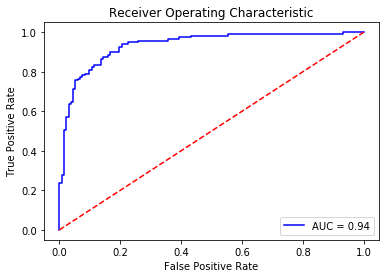

Sample predictions: 


,index,structureChainId,alpha,beta,coil,foldType,features,indexedLabel,predictions
0,17874,3ABH.B,0.795139,0.006944,0.197917,alpha,"[0.10236471290385704, -0.1388118245258592, 0.4...",0,alpha
1,7009,3IXS.J,0.000000,0.766667,0.233333,beta,"[0.11298573969138992, 0.3066096729081538, 0.62...",1,beta
2,9891,3WG3.A,0.024540,0.527607,0.447853,beta,"[-0.048722811627312235, 0.1715540477195702, 0....",1,beta
3,5338,3FT1.C,0.000000,0.525253,0.474747,beta,"[0.06991478345460363, 0.1251197224576967, 0.54...",1,beta
4,12036,4E5X.E,0.000000,0.490000,0.510000,beta,"[0.03959714150940529, 0.03838062713468316, 0.4...",1,beta
5,9845,3VN0.A,0.875000,0.000000,0.125000,alpha,"[0.14008687153458596, -0.1254805113375187, 0.8...",0,alpha
6,13448,2RBD.A,0.729560,0.012579,0.257862,alpha,"[0.02859262450981666, 0.011427379076314323, 0....",0,beta
7,766,3MMG.D,0.000000,0.500000,0.500000,beta,"[0.20015033653804232, 0.42783163700784954, 0.6...",1,beta
8,3879,4Q94.A,0.813953,0.007752,0.178295,alpha,"[0.07949779724785641, -0.042684748657603765, 0...",0,alpha
9,693,3M7O.A,0.000000,0.591241,0.408759,beta,"[0.042166234335358835, 0.04255943773140818, 0....",1,beta


In [8]:
from sklearn.neural_network import MLPClassifier

layers = [featureCount, 32, 32, classCount]
clf = MLPClassifier(solver='sgd', \
                    alpha=1e-5, \
                    hidden_layer_sizes = (32, 32))
mcc = mltoolkit.MultiClassClassifier(clf, 'foldType', testFraction=0.1)

matrics = mcc.fit(df)
for k,v in matrics.items(): print(f"{k}\t{v}")
    
# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)
    
print("Sample predictions: ")
mcc.prediction.head(10)

## Terminate Spark

In [9]:
spark.stop()